In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('housepricedata.csv')

In [12]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [13]:
dataset = df.values

In [14]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [15]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [16]:
from sklearn import preprocessing

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [21]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [22]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [23]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 313us/step - loss: 0.7277 - acc: 0.5127 - val_loss: 0.7299 - val_acc: 0.4612
Epoch 2/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.7059 - acc: 0.4765 - val_loss: 0.7096 - val_acc: 0.4612
Epoch 3/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6938 - acc: 0.5372 - val_loss: 0.6952 - val_acc: 0.4521
Epoch 4/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.6847 - acc: 0.5597 - val_loss: 0.6838 - val_acc: 0.5662
Epoch 5/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.6763 - acc: 0.6194 - val_loss: 0.6735 - val_acc: 0.6484
Epoch 6/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.6680 - acc: 0.6663 - val_loss: 0.6635 - val_acc: 0.7032
Epoch 7/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.6596 - a

1022/1022 [==============================] - 0s 68us/step - loss: 0.3320 - acc: 0.8689 - val_loss: 0.2880 - val_acc: 0.8950
Epoch 59/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.3295 - acc: 0.8689 - val_loss: 0.2860 - val_acc: 0.8950
Epoch 60/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3284 - acc: 0.8689 - val_loss: 0.2846 - val_acc: 0.8950
Epoch 61/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3264 - acc: 0.8699 - val_loss: 0.2829 - val_acc: 0.8950
Epoch 62/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.3251 - acc: 0.8679 - val_loss: 0.2810 - val_acc: 0.8904
Epoch 63/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.3233 - acc: 0.8689 - val_loss: 0.2796 - val_acc: 0.8950
Epoch 64/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.3221 - acc: 0.8718 - val_loss: 0.2780 - val_acc: 0.8904
Epoch 65/100
1022/1022 [==============================

In [27]:
import matplotlib.pyplot as plt

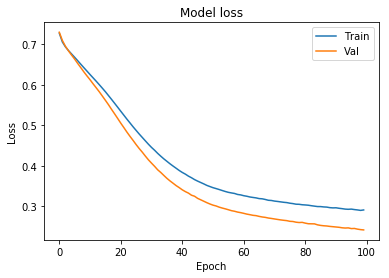

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

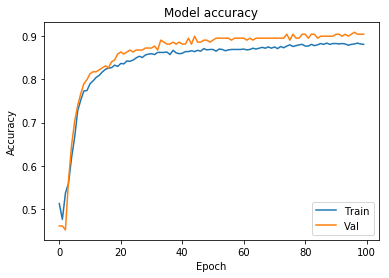

In [29]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
import numpy as np
model.predict_classes(X_test)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [31]:
Y_test

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)